## Importing Important Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
plt.style.use("seaborn")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Reading the csv File


In [2]:
df=pd.read_csv("./insurance.txt")
df = df.sample(frac = 1).reset_index(drop = True)
print(df)

      age    bmi  children     charges
0      29  35.53         0   3366.6697
1      39  45.43         2   6356.2707
2      49  25.60         2  23306.5470
3      40  32.30         2   6986.6970
4      54  30.80         3  12105.3200
...   ...    ...       ...         ...
1333   31  29.81         0  19350.3689
1334   59  27.50         0  12233.8280
1335   51  34.96         2  44641.1974
1336   44  30.69         2   7731.4271
1337   41  35.75         1  40273.6455

[1338 rows x 4 columns]


## Calculating Root Mean Square Error

In [3]:
def rmse(wt,X,Y):
    ev= Y-X@wt
    error=np.dot(ev,ev)
    mse=error/X.shape[0]
    return math.sqrt(mse)

In [4]:
def r2_score(Y,Y_pred):
    num=np.sum((Y-Y_pred)**2)
    den=np.sum((Y-Y.mean())**2)
    score=(1-num/den)
    return score*100

## Implementing Polynomial Features

In [5]:
def poly_model(deg,df):
    X=df.values[:,:2]
    y=df.values[:,3]
    poly = PolynomialFeatures(deg,include_bias=False)
    X=poly.fit_transform(X)
    return X,y

## Standardizind the input data z = (xi – μ)/σ

In [6]:
def feature_scaling(X,y):
    u=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X=(X-u)/std
    ones=np.ones((X.shape[0],1))
    X = np.append(ones,X, axis=1)
    u=np.mean(y,axis=0)
    std=np.std(y,axis=0)
    y=(y-u)/std
    n=round(X.shape[0]*0.7)
    n2=round(X.shape[0]*0.9)
    X_train,X_valid,X_test=np.split(X,[n,n2])
    y_train,y_valid,y_test=np.split(y,[n,n2])
    return X_train,X_test,X_valid,y_train,y_valid,y_test

## Implementing Gradient Descent Using Lasso (L1) Regularization

In [9]:
def Lasso_Regularization_gd(i,X,Y):    
    n=X.shape[1]
    m=X.shape[0]
    wt=np.random.randn(n)
    lr =  5e-7
    iterations = 25000
    prev_error=1e10
    error_list = []
    rmse_list=[]
    acc_list=[]
    wt_list=[]
    lasso_coeff = i
    sgn = lambda x: (x / abs(x)) #signum function
    count=0    
    while True:
        wt_list.append(wt)
        hypothesis = ((X @ wt) - Y)
        error = 0.5 * ((hypothesis @ hypothesis) + lasso_coeff*sum([abs(w) for w in wt]))
        acc=r2_score(Y,X@wt)
        rmsev=rmse(wt,X,Y)
        error_list.append(error)
        acc_list.append(acc)
        rmse_list.append(rmsev)
        if count % 500 == 0:            
            print("epoch = ", count,"error = ",error)
        if abs(prev_error-error) <= 0.005:
            break
        prev_error = error
        sgn_w = np.array([sgn(w) for w in wt])
        wt -= lr * ((X.T @ hypothesis) + lasso_coeff*sgn_w) 
        count += 1
    return wt,error_list,acc_list,rmse_list

In [8]:
start=time.time()
rmse_error_degreeWise_lasso_gd=[]
rmse_error_degreeWise_lasso_gd_validate=[]
rmse_error_degreeWise_lasso_gd_test=[]
for j in range(1,11):
    error_list = []
    rmse_list=[]
    acc_list=[]
    rmse_error_for_degree_j=[]
    rmse_error_for_degree_j_validate=[]
    rmse_error_for_degree_j_testing=[]
    L1_coeff = [0.0, 0.05, 0.15, 0.25, 0.35, 0.45,0.55, 0.65, 0.75, 0.85, 0.95, 1.0] # Lambda values for L1 Regularization
    print("****Polynomial of degree****",j)
    for i in L1_coeff:
        print("Value of Lambda (L1) :",i)
        X,y=poly_model(j,df) # Using Polynomial Features
        X_train,X_test,X_valid,y_train,y_valid,y_test=feature_scaling(X,y) # Standardizing the Data        
        wt,error,acc,rmsev=Lasso_Regularization_gd(i,X_train,y_train) # Calling Polynomial Regression with Laso Regularization
        error_list.append(error)
        rmse_list.append(rmsev)
        acc_list.append(acc)
        acc=r2_score(y_train,X_train@wt)
        rmsev=rmse(wt,X_train,y_train)
        rmse_error_for_degree_j.append(rmsev)
        rmse_error_for_degree_j_validate.append(rmse(wt,X_valid,y_valid))
        rmse_error_degreeWise_lasso_gd_test.append(rmse(wt,X_test,y_test))                                            
                                                
        print("Weights:",wt)
        print("Training RMSE:",rmsev,"Validation RMSE:",rmse(wt,X_valid,y_valid),"Testing RMSE:",rmse(wt,X_test,y_test),"\n")
        
    rmse_error_degreeWise_lasso_gd.append(min(rmse_error_for_degree_j))
    rmse_error_degreeWise_lasso_gd_validate.append(min(rmse_error_for_degree_j_validate))
    rmse_error_degreeWise_lasso_gd_test.append(min(rmse_error_degreeWise_lasso_gd_test))
    
                                          
end=time.time()
print("Time taken is: ",(end-start))

****Polynomial of degree**** 1
Value of Lambda (L1) : 0.0
epoch =  0 error =  1306.3693283007153
epoch =  500 error =  1002.2177026111581
epoch =  1000 error =  802.6805067757555
epoch =  1500 error =  671.6677579489746
epoch =  2000 error =  585.5804841490074
epoch =  2500 error =  528.9721016244298
epoch =  3000 error =  491.72259073867207
epoch =  3500 error =  467.19578377814304
epoch =  4000 error =  451.03637229863364
epoch =  4500 error =  440.3837013373508
epoch =  5000 error =  433.3574264216953
epoch =  5500 error =  428.7207003392005
Weights: [0.05095478 0.36408531 0.09115003]
Training RMSE: 0.9532609617074189 Validation RMSE: 0.9240999301737284 Testing RMSE: 0.9482571941896621 

Value of Lambda (L1) : 0.05
epoch =  0 error =  1270.2364947760495
epoch =  500 error =  980.4358572766557
epoch =  1000 error =  789.6501213590426
epoch =  1500 error =  663.9412812603092
epoch =  2000 error =  581.0464731908338
epoch =  2500 error =  526.3447469934276
epoch =  3000 error =  490.22

epoch =  2000 error =  560.4359991190044
epoch =  2500 error =  511.4887366410013
epoch =  3000 error =  482.052507112785
epoch =  3500 error =  463.86511767164245
epoch =  4000 error =  452.50425875472325
epoch =  4500 error =  445.3682354316363
epoch =  5000 error =  440.8658607464271
Weights: [-0.10209463  0.01214227  1.18476442 -0.18377496  0.52835763 -1.25551731]
Training RMSE: 0.9674045297328583 Validation RMSE: 0.9510742975637335 Testing RMSE: 0.9477364570317928 

Value of Lambda (L1) : 0.15
epoch =  0 error =  1475.5105126822377
epoch =  500 error =  813.3459056151784
epoch =  1000 error =  591.0181097420204
epoch =  1500 error =  504.3410068338012
epoch =  2000 error =  466.0987468526329
epoch =  2500 error =  447.6304589122692
epoch =  3000 error =  438.1155685365032
epoch =  3500 error =  432.9674004781382
Weights: [ 0.09404562 -0.04702656  0.65888551 -0.14403849  0.53560119 -0.70022994]
Training RMSE: 0.9585840129949088 Validation RMSE: 0.9398270954182876 Testing RMSE: 0.94

epoch =  1500 error =  518.2136570888342
epoch =  2000 error =  501.5442069128648
epoch =  2500 error =  494.9172571676967
epoch =  3000 error =  491.22835661741243
epoch =  3500 error =  488.4751740718904
Weights: [ 0.03292784  1.06711162  0.94936014 -1.09160433 -0.52027132  0.4355295
  1.44368638  0.02932749 -1.07734173 -0.26419042]
Training RMSE: 1.0203119189967713 Validation RMSE: 0.9882746114608459 Testing RMSE: 1.0391147780962107 

Value of Lambda (L1) : 0.25
epoch =  0 error =  5187.888763028301
epoch =  500 error =  1103.2202628228742
epoch =  1000 error =  599.516447793503
epoch =  1500 error =  493.0552543620838
epoch =  2000 error =  464.38699574373925
epoch =  2500 error =  455.72598659154244
Weights: [-0.0379547   0.51368865  0.78912031 -1.01307048  1.19818095  0.27257412
  0.82013873 -0.9794915  -0.24629    -0.96135799]
Training RMSE: 0.9827885702641295 Validation RMSE: 0.9467270955605317 Testing RMSE: 0.9398096524583206 

Value of Lambda (L1) : 0.35
epoch =  0 error =  4

epoch =  500 error =  589.0073602827435
epoch =  1000 error =  519.430254681282
epoch =  1500 error =  492.43923296248397
epoch =  2000 error =  477.07665436336407
epoch =  2500 error =  467.2897757826084
epoch =  3000 error =  460.73612483783324
epoch =  3500 error =  456.18004455176134
epoch =  4000 error =  452.885399751092
Weights: [-0.0799986  -0.11190483  0.7110784  -0.09968598  0.34208738 -0.61168093
 -0.81259686 -0.20550324 -0.11717332  0.9939702   0.40891835  0.70593285
  0.7613963  -0.86499533 -0.76588627]
Training RMSE: 0.9812287312007412 Validation RMSE: 1.0004118172490002 Testing RMSE: 1.0144486282499396 

Value of Lambda (L1) : 0.25
epoch =  0 error =  6032.215403799882
epoch =  500 error =  1019.2564249563184
epoch =  1000 error =  847.0900798120377
epoch =  1500 error =  772.7309448383306
epoch =  2000 error =  723.3316388201649
epoch =  2500 error =  688.0360654534541
epoch =  3000 error =  661.5943861820355
epoch =  3500 error =  640.9206738959673
epoch =  4000 error 

epoch =  2000 error =  527.5540598248155
epoch =  2500 error =  520.650880689604
epoch =  3000 error =  514.9838730925431
epoch =  3500 error =  509.8396086802781
epoch =  4000 error =  505.05807490756354
epoch =  4500 error =  500.58186146664843
epoch =  5000 error =  496.37785982876255
epoch =  5500 error =  492.421841563479
epoch =  6000 error =  488.69433048927226
epoch =  6500 error =  485.1789171091126
epoch =  7000 error =  481.86133859244313
epoch =  7500 error =  478.7289123412983
epoch =  8000 error =  475.77017071037477
epoch =  8500 error =  472.9746189738031
epoch =  9000 error =  470.33257068661067
Weights: [-0.00258731  0.35776603 -0.47260057 -1.20289663 -0.76212123  0.56372537
 -0.56818541  1.30200099  0.06886443 -0.78093505  1.43494285 -0.53836788
 -0.61493107  1.39390694  0.06695348]
Training RMSE: 0.9955065794536345 Validation RMSE: 1.0038978273940073 Testing RMSE: 1.068115611411574 

Value of Lambda (L1) : 1.0
epoch =  0 error =  805.7591632760877
epoch =  500 error

epoch =  5500 error =  548.7962732165995
epoch =  6000 error =  535.7669409260692
epoch =  6500 error =  524.1491498947398
epoch =  7000 error =  513.773640742818
epoch =  7500 error =  504.49876304681277
epoch =  8000 error =  496.2020734298894
epoch =  8500 error =  488.7757898052225
epoch =  9000 error =  482.1307771573422
epoch =  9500 error =  476.18393654880344
epoch =  10000 error =  470.8520697175644
epoch =  10500 error =  466.06918989548024
epoch =  11000 error =  461.7766883700197
epoch =  11500 error =  457.9224613075439
epoch =  12000 error =  454.4624970727785
epoch =  12500 error =  451.3560368927389
epoch =  13000 error =  448.5628542254
Weights: [-0.00319846 -0.6788132   0.58830365  0.09866982  0.38242916  0.53923227
  0.68060361  0.19855506 -0.70893625 -1.12860332  0.68503548 -0.82651053
 -0.35890437 -0.52973988  0.01496654 -0.47348424 -0.12409007  0.84740913
  0.3355134   0.95073589 -0.12662884]
Training RMSE: 0.974990429200495 Validation RMSE: 1.0040248665379463 Tes

epoch =  500 error =  877.617495290692
epoch =  1000 error =  767.6810675175639
epoch =  1500 error =  728.329904215568
epoch =  2000 error =  697.5662023033998
epoch =  2500 error =  670.8287419515874
epoch =  3000 error =  647.1543276061907
epoch =  3500 error =  626.0831589498002
epoch =  4000 error =  607.2704474169723
epoch =  4500 error =  590.4355155070339
epoch =  5000 error =  575.343668208236
epoch =  5500 error =  561.7953137688945
epoch =  6000 error =  549.6185467603256
epoch =  6500 error =  538.663871902551
epoch =  7000 error =  528.8003317219253
epoch =  7500 error =  519.9125779530103
epoch =  8000 error =  511.89859198375206
epoch =  8500 error =  504.66786309029106
epoch =  9000 error =  498.13989865000235
epoch =  9500 error =  492.242982198025
epoch =  10000 error =  486.9131219271732
epoch =  10500 error =  482.0931495385263
epoch =  11000 error =  477.7319406873643
epoch =  11500 error =  473.7837358078022
epoch =  12000 error =  470.2075452059994
epoch =  12500

epoch =  4000 error =  596.233672224119
epoch =  4500 error =  566.7381616954495
epoch =  5000 error =  544.4638844204025
epoch =  5500 error =  527.3127757495104
epoch =  6000 error =  513.8733973633096
epoch =  6500 error =  503.18335049008203
epoch =  7000 error =  494.5670102324681
epoch =  7500 error =  487.54548324815636
epoch =  8000 error =  481.7714283565548
epoch =  8500 error =  476.9873909505185
epoch =  9000 error =  472.9987104013949
epoch =  9500 error =  469.655483117848
epoch =  10000 error =  466.84037404333253
Weights: [ 0.02006749  1.50269159 -0.51737352 -0.25551199  1.63272589  0.70893094
 -2.07662504  0.56163578 -0.77603785 -0.07025327 -0.25893989  0.71821579
 -1.52388462  0.26860731 -0.11748992 -0.45049213 -1.92443145 -0.92164626
  0.03811822 -0.27083735  0.4713817   1.36237851  0.58234157  1.47870984
  0.83686728  0.01866608 -0.51227537  0.04194329]
Training RMSE: 0.9928833015867021 Validation RMSE: 0.9232869572008091 Testing RMSE: 0.9670564937762424 

Value of 

epoch =  5000 error =  561.3121991007006
epoch =  5500 error =  534.2769158801752
epoch =  6000 error =  513.1778868857962
epoch =  6500 error =  496.6121315053096
epoch =  7000 error =  483.53624370693495
epoch =  7500 error =  473.16591271949346
epoch =  8000 error =  464.9059357027495
epoch =  8500 error =  458.3071944134097
epoch =  9000 error =  453.0151507180525
epoch =  9500 error =  448.75222112282654
epoch =  10000 error =  445.3063174163048
epoch =  10500 error =  442.5112089819551
Weights: [-0.00396267  0.01377022  0.60101678  0.81405698 -1.17572277 -0.62708244
 -0.39954563  0.31123943 -0.14352364 -0.29356027  0.42067215 -0.1579623
 -0.40459311  0.90034284  0.52252693  0.86416495 -1.44936793  0.81531085
  1.75187832 -1.09188859  0.17250284 -0.25825346 -0.23306826  0.83947386
 -1.39052277 -0.55386281  1.34165079 -0.74709774]
Training RMSE: 0.9616794894753706 Validation RMSE: 0.9738513794265958 Testing RMSE: 0.9932763528553031 

****Polynomial of degree**** 7
Value of Lambda (

epoch =  7500 error =  539.888160414638
epoch =  8000 error =  535.1144109250914
epoch =  8500 error =  530.9639415336271
epoch =  9000 error =  527.2901951332614
epoch =  9500 error =  523.9872498238343
epoch =  10000 error =  520.9775403825327
epoch =  10500 error =  518.2035207834773
Weights: [ 0.006403    0.32319888  0.56422989  0.73119102  0.97385055  0.24191693
 -0.62045622 -0.29337231 -0.13707077 -0.06683401  0.43512469 -0.53629896
 -0.96719825 -1.65493061 -1.19834052 -0.44734252  0.02766423  1.3902755
 -0.31959665  0.90406136  0.94126402 -1.05636195  0.22693295 -1.36454272
 -0.20748782  1.82574435 -0.77370751  0.37148186 -0.10534561  0.51011741
  0.27039827  2.51708314 -0.26452845 -1.58425036 -0.58190164  0.49173684]
Training RMSE: 1.043404008905397 Validation RMSE: 1.0164925628833466 Testing RMSE: 1.0744605112943917 

Value of Lambda (L1) : 0.55
epoch =  0 error =  38352.83028157823
epoch =  500 error =  671.7836399033655
epoch =  1000 error =  594.9380920553998
epoch =  1500 

epoch =  500 error =  1161.589325512267
epoch =  1000 error =  933.5146443085976
epoch =  1500 error =  785.3678603224905
epoch =  2000 error =  683.1194660723515
epoch =  2500 error =  612.200626525286
epoch =  3000 error =  562.8061204276967
epoch =  3500 error =  528.2552928077448
epoch =  4000 error =  503.9789485555784
epoch =  4500 error =  486.8405504631414
epoch =  5000 error =  474.67918001142704
epoch =  5500 error =  466.00069209496405
epoch =  6000 error =  459.7682675618524
epoch =  6500 error =  455.2598725125099
epoch =  7000 error =  451.9709117648252
Weights: [-0.02097387  0.29773027 -0.48581563 -0.56534754  1.27147072  0.7889912
 -0.19396243  0.73999365  0.9321054  -0.15493547 -0.43842471 -0.58856014
 -0.21188821 -0.48404798  0.79682397 -0.89389319 -0.04169283 -0.64138913
 -0.00725242 -1.96408261 -0.68891171  1.04775108 -0.40875649 -0.04225426
 -1.09850001 -1.05919482  0.58162499 -0.163321    0.82437251 -1.89409474
  0.46175963  0.37159104  2.06776325  0.87503699  1.2

epoch =  6500 error =  503.2319847121396
Weights: [-0.05576575 -1.56110571 -0.03279191 -0.37577177  0.34854378  0.57842996
 -0.72086438  0.980085   -0.11733865 -0.39123016  0.74552222  0.76389399
  0.12244848 -0.40481798  0.70179998  1.62806516  1.13657176  0.9277277
  1.00811995 -1.23947684 -0.4854728   0.63317303 -1.15941376 -0.33052708
  0.81184502 -0.13248181 -0.34800974 -0.41043234 -1.39922814  1.0315971
 -0.98699977 -0.1439444  -0.43363238 -1.19773656 -0.00337775 -0.807205
 -1.2735001   1.50098137 -1.54264983 -0.57077654  0.41160922 -0.16241062
  1.48392942  0.27905467  1.30992107]
Training RMSE: 1.0266315335035645 Validation RMSE: 1.0183669730827998 Testing RMSE: 1.0323119190129342 

Value of Lambda (L1) : 0.65
epoch =  0 error =  2301.326938149419
epoch =  500 error =  765.2416125227343
epoch =  1000 error =  684.6763513115192
epoch =  1500 error =  633.5224469955277
epoch =  2000 error =  600.4473674441442
epoch =  2500 error =  578.6430112040292
epoch =  3000 error =  563.899

epoch =  500 error =  1723.9832826412471
epoch =  1000 error =  1213.1722993780681
epoch =  1500 error =  927.5187772600266
epoch =  2000 error =  761.8110264209054
epoch =  2500 error =  663.8124111784078
epoch =  3000 error =  604.7051864558784
epoch =  3500 error =  568.28943926525
epoch =  4000 error =  545.3039580929668
epoch =  4500 error =  530.3729678825217
epoch =  5000 error =  520.3335662476345
epoch =  5500 error =  513.3026658248099
epoch =  6000 error =  508.14748388917974
epoch =  6500 error =  504.18031415181594
epoch =  7000 error =  500.98012856703684
epoch =  7500 error =  498.28704987650997
Weights: [-0.03659855 -1.70624732 -1.30443022  0.23451496  0.15816339 -0.22629499
 -0.11908822  1.69290884 -0.25316562  0.22685741  0.4259435   0.09803702
  0.88570667 -1.2767964   1.16664011 -0.74798154  2.17565351 -0.23953157
  1.90164461  0.27584109 -0.84023879  0.22674523 -1.29355534 -0.33805287
 -0.14011527 -0.45732969  0.96538361  1.4881779   0.37543083 -0.12896961
 -1.7446

epoch =  500 error =  901.6042926744034
epoch =  1000 error =  711.2496109176743
epoch =  1500 error =  642.9498924112881
epoch =  2000 error =  604.6974073070505
epoch =  2500 error =  581.4304837777679
epoch =  3000 error =  565.9092441744523
epoch =  3500 error =  554.5492233535967
epoch =  4000 error =  545.5479630225377
epoch =  4500 error =  537.9804199118694
epoch =  5000 error =  531.3587152379707
epoch =  5500 error =  525.4159599177136
epoch =  6000 error =  519.9989730019554
epoch =  6500 error =  515.0218774649444
epoch =  7000 error =  510.41709737202575
epoch =  7500 error =  506.13984063396947
epoch =  8000 error =  502.1576933418188
epoch =  8500 error =  498.44460762169734
epoch =  9000 error =  494.97866950562803
epoch =  9500 error =  491.74082309866384
epoch =  10000 error =  488.7141165381814
epoch =  10500 error =  485.88334252095143
epoch =  11000 error =  483.2350191464829
Weights: [ 4.06511245e-04  2.35287529e-01  9.80949549e-01  9.70341385e-01
 -2.43646939e+00

epoch =  500 error =  1278.8528371896564
epoch =  1000 error =  943.1998356872891
epoch =  1500 error =  747.542873465662
epoch =  2000 error =  631.5350965951657
epoch =  2500 error =  561.9927839497446
epoch =  3000 error =  519.8117736149544
epoch =  3500 error =  493.86186131168677
epoch =  4000 error =  477.6035891351678
epoch =  4500 error =  467.1706793684107
epoch =  5000 error =  460.2659496459697
epoch =  5500 error =  455.5185681172957
epoch =  6000 error =  452.10697191804434
Weights: [ 0.02028891  0.24624473  0.04187725 -0.13717703  1.2354461  -0.80776898
  0.64779949  0.25849294 -0.7702875  -0.26969677  0.21022625 -1.75564531
  1.84762238 -0.35168887  0.54492803 -0.03675987  0.18353083 -2.27573057
  1.86622644 -0.44603888  2.1016827  -2.01797549  0.22032002  0.59019089
 -1.29505244 -1.7433353  -0.78782091 -1.04511865  0.53923144  0.01130982
  0.39418669 -0.2121489   0.29466454  1.24920893 -0.93838397  0.93535857
 -0.6508087   1.21818742 -0.9033465   0.67221288  0.52400502

epoch =  2000 error =  665.7075660149205
epoch =  2500 error =  585.9850628560315
epoch =  3000 error =  538.1169064765397
epoch =  3500 error =  508.71441967381065
epoch =  4000 error =  490.3219240980836
epoch =  4500 error =  478.6171788190509
epoch =  5000 error =  471.0246414375405
epoch =  5500 error =  465.98189814788776
epoch =  6000 error =  462.5303181014931
Weights: [ 0.08718375  0.70397944 -1.25836874 -0.24723048 -0.58506501  0.14089463
 -1.53349503 -0.37675456  0.63250761  1.45682444 -1.5819964  -0.39455155
  0.5584714   0.25249009 -0.41924756  2.40564647  0.07559382  0.42223895
  1.1079652   0.62377364 -1.06493678  0.26420306  0.66242951  1.19251379
  0.96706312  0.32038101 -1.27645809  1.57311839  0.01169327 -0.81699569
  0.05578849 -0.21232487 -0.5449337  -0.88737978 -0.39231311  0.16025839
 -2.45132578  1.09154817  0.13267042  0.57022675 -0.59332773  0.37671018
 -1.15567139  0.93458297 -0.79189823  0.97050465 -0.42849186 -1.1000223
 -1.15930421 -1.95998793  0.31341122 

epoch =  500 error =  2798.3111459415018
epoch =  1000 error =  1741.3600341023596
epoch =  1500 error =  1192.2913027699983
epoch =  2000 error =  900.7112695810509
epoch =  2500 error =  742.8299053748791
epoch =  3000 error =  655.372764935094
epoch =  3500 error =  605.5820770267684
epoch =  4000 error =  576.2711835962289
epoch =  4500 error =  558.2932576698913
epoch =  5000 error =  546.7064658796879
epoch =  5500 error =  538.7988342168293
epoch =  6000 error =  533.0581629566836
epoch =  6500 error =  528.6275354692649
epoch =  7000 error =  525.0133879775797
epoch =  7500 error =  521.9266752313225
epoch =  8000 error =  519.1951608602903
Weights: [ 0.03118095  0.02229436  0.45154787  1.94926271 -1.63892494  1.40368949
  1.38016068  1.00900025 -0.32265245 -1.42282756 -0.98757013 -0.91109194
 -1.34857585 -0.19680882  1.34356362 -0.20737223  0.22430146  0.78872012
  0.17910642 -0.72510237 -0.8370286   0.06426113  0.5225035  -0.28425279
 -0.06169129  1.3049336   1.5675365   0.20

In [10]:
print("Minimum Error Degree Wise For Gradient Descent With Lasso Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_lasso_gd[i])


Minimum Error Degree Wise For Gradient Descent With Lasso Regularization
Minimum RMSE Error for Degree- 1   :0.951927586462345
Minimum RMSE Error for Degree- 2   :0.9509868880998823
Minimum RMSE Error for Degree- 3   :0.9514939037138725
Minimum RMSE Error for Degree- 4   :0.9812287312007412
Minimum RMSE Error for Degree- 5   :0.96865926457622
Minimum RMSE Error for Degree- 6   :0.9602965638193323
Minimum RMSE Error for Degree- 7   :0.9605986182091095
Minimum RMSE Error for Degree- 8   :0.9688005613776881
Minimum RMSE Error for Degree- 9   :0.9811697736373375
Minimum RMSE Error for Degree- 10   :0.9747611446135432


In [11]:
print("Minimum Error Degree Wise For Testing Data for Gradient Descent With Lasso Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_lasso_gd_test[i])


Minimum Error Degree Wise For Testing Data for Gradient Descent With Lasso Regularization
Minimum RMSE Error for Degree- 1   :0.9482571941896621
Minimum RMSE Error for Degree- 2   :0.9470610089381379
Minimum RMSE Error for Degree- 3   :0.9443215032842894
Minimum RMSE Error for Degree- 4   :0.9441961994292352
Minimum RMSE Error for Degree- 5   :0.9437400323473885
Minimum RMSE Error for Degree- 6   :0.945190933985566
Minimum RMSE Error for Degree- 7   :0.9435426203283676
Minimum RMSE Error for Degree- 8   :0.943441988271332
Minimum RMSE Error for Degree- 9   :0.9431206277341695
Minimum RMSE Error for Degree- 10   :0.9443195828922791


In [25]:
print("Minimum Error Degree Wise For Validation Data for Gradient Descent With Lasso Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_lasso_gd_validate[i])


Minimum Error Degree Wise For Validation Data for Gradient Descent With Lasso Regularization
Minimum RMSE Error for Degree- 1   :0.919716672164424
Minimum RMSE Error for Degree- 2   :0.922693130050568
Minimum RMSE Error for Degree- 3   :0.9252306532943481
Minimum RMSE Error for Degree- 4   :0.9220056322890503
Minimum RMSE Error for Degree- 5   :0.9294530192391929
Minimum RMSE Error for Degree- 6   :0.9104278213952589
Minimum RMSE Error for Degree- 7   :0.9173141001874823
Minimum RMSE Error for Degree- 8   :0.9408278171299053
Minimum RMSE Error for Degree- 9   :0.9316363336425783
Minimum RMSE Error for Degree- 10   :0.9335309820681303


## Implementing Gradient Descent using Ridge Regularization

In [12]:

def Ridge_Regularization_gd(i,X,Y):
    wt=np.ones(X.shape[1])
    lr = 5e-7
    iterations = 2500
    prev_error=100000000
    error_list = []
    acc_list=[]
    rmse_list=[]
    ridge_coeff = i
    count=0
    while True:
        hypothesis = ((X @ wt) - Y)
        error = 0.5 * ((hypothesis @ hypothesis) + ridge_coeff*sum([w*w for w in wt]))
        acc=r2_score(Y,X@wt)
        rmsev=rmse(wt,X,Y)
        error_list.append(error)
        acc_list.append(acc)
        rmse_list.append(rmsev)
        if count % 500 == 0:
            print("epoch = ", count,"error = ",error)
        if abs(prev_error-error) <= 0.005:
            break
        wt -= lr * ((X.T @ hypothesis) + 2*ridge_coeff*wt)
        prev_error = error
        count += 1       
    return wt,error_list,acc_list,rmse_list

In [13]:
start=time.time()
rmse_error_degreeWise_ridge_gd=[]
rmse_error_degreeWise_ridge_gd_validate=[]
rmse_error_degreeWise_ridge_gd_test=[]
for j in range(1,11):
    error_list = []
    rmse_list=[]
    acc_list=[]
    rmse_error_for_degree_j=[]
    rmse_error_for_degree_j_validate=[]
    rmse_error_for_degree_j_testing=[]
    L1_coeff=[0.80]
    print(type(df))
    L1_coeff = [0.0, 0.05, 0.15, 0.25, 0.35, 0.45,0.55, 0.65, 0.75, 0.85, 0.95, 1.0]
    print("Polynomial of degree",j)
    for i in L1_coeff:
        print("L1:",i)
        X,y=poly_model(j,df)
        X_train,X_test,X_valid,y_train,y_valid,y_test=feature_scaling(X,y)
        wt,error,acc,rmsev=Ridge_Regularization_gd(i,X_train,y_train)
        error_list.append(error)
        rmse_list.append(rmsev)
        acc_list.append(acc)
        acc=r2_score(y_train,X_train@wt)
        rmsev=rmse(wt,X_train,y_train)
        rmse_error_for_degree_j.append(rmsev)
        rmse_error_for_degree_j_validate.append(rmse(wt,X_valid,y_valid))
        rmse_error_for_degree_j_testing.append(rmse(wt,X_test,y_test))
        print("Weights:",wt)
        print("Training RMSE:",rmsev,"Validation RMSE:",rmse(wt,X_valid,y_valid),"Testing RMSE:",rmse(wt,X_test,y_test),"\n")
    rmse_error_degreeWise_ridge_gd.append(min(rmse_error_for_degree_j)) 
    rmse_error_degreeWise_ridge_gd_validate.append(min(rmse_error_for_degree_j_validate))
    rmse_error_degreeWise_ridge_gd_test.append(min(rmse_error_for_degree_j_testing))
end=time.time()
print("Time taken is: ",(end-start))

<class 'pandas.core.frame.DataFrame'>
Polynomial of degree 1
L1: 0.0
epoch =  0 error =  1520.824564538051
epoch =  500 error =  1086.123368720319
epoch =  1000 error =  823.3813378045321
epoch =  1500 error =  664.438657084655
epoch =  2000 error =  568.2050928675562
epoch =  2500 error =  509.8888106587969
epoch =  3000 error =  474.5190740034245
epoch =  3500 error =  453.04801687060984
epoch =  4000 error =  440.0026938738979
epoch =  4500 error =  432.06972783634114
epoch =  5000 error =  427.2414240600865
Weights: [0.08426335 0.32110849 0.21727384]
Training RMSE: 0.9521676806052582 Validation RMSE: 0.9226692243117709 Testing RMSE: 0.946184487758816 

L1: 0.05
epoch =  0 error =  1520.899564538051
epoch =  500 error =  1086.1331720730266
epoch =  1000 error =  823.3656842930698
epoch =  1500 error =  664.4161480789123
epoch =  2000 error =  568.1836869905903
epoch =  2500 error =  509.8713184259059
epoch =  3000 error =  474.505970474522
epoch =  3500 error =  453.03883634537965
e

epoch =  2500 error =  467.78410736453026
epoch =  3000 error =  447.6777171610676
epoch =  3500 error =  436.3017279324547
epoch =  4000 error =  429.49450800651044
epoch =  4500 error =  425.3222219695064
Weights: [ 0.11124846  0.17596093  0.10553846  0.18734461 -0.09224341  0.1085281 ]
Training RMSE: 0.951034713571466 Validation RMSE: 0.9241401810960016 Testing RMSE: 0.9516681285220685 

L1: 0.15
epoch =  0 error =  7040.65370897686
epoch =  500 error =  2090.8207387287493
epoch =  1000 error =  915.605883506778
epoch =  1500 error =  606.3017806528404
epoch =  2000 error =  507.8588865090604
epoch =  2500 error =  467.76835517446335
epoch =  3000 error =  447.66759675996366
epoch =  3500 error =  436.29569354510096
epoch =  4000 error =  429.49151625243525
epoch =  4500 error =  425.3214798699008
Weights: [ 0.11124627  0.17591609  0.10551691  0.18729576 -0.09215562  0.10850462]
Training RMSE: 0.9510344133196631 Validation RMSE: 0.9241402204131739 Testing RMSE: 0.9516667388270553 



Weights: [ 0.11140288  0.16203187  0.10462658  0.15551489 -0.10101527  0.09842062
  0.16551652 -0.01556555 -0.13741334  0.10430935]
Training RMSE: 0.951760561194623 Validation RMSE: 0.9251148005626126 Testing RMSE: 0.9596952994355139 

L1: 0.25
epoch =  0 error =  23907.595515491776
epoch =  500 error =  2035.818822609483
epoch =  1000 error =  690.4555288234703
epoch =  1500 error =  542.1114262901302
epoch =  2000 error =  491.8703620436232
epoch =  2500 error =  464.010066376883
epoch =  3000 error =  447.1021823670986
epoch =  3500 error =  436.6279610633308
epoch =  4000 error =  430.08706953712823
epoch =  4500 error =  425.9835193396021
Weights: [ 0.11140041  0.16197827  0.10459244  0.15546696 -0.10094569  0.09838909
  0.16546556 -0.01553566 -0.13733073  0.10427455]
Training RMSE: 0.9517582076551294 Validation RMSE: 0.9251137172688751 Testing RMSE: 0.9596913262202965 

L1: 0.35
epoch =  0 error =  23908.095515491776
epoch =  500 error =  2035.715215253376
epoch =  1000 error =  

epoch =  500 error =  1356.79645914036
epoch =  1000 error =  626.0245798007442
epoch =  1500 error =  541.1349987002939
epoch =  2000 error =  496.4616790851404
epoch =  2500 error =  469.2419056636716
epoch =  3000 error =  452.17576291552456
epoch =  3500 error =  441.3515741424161
epoch =  4000 error =  434.4244287410972
epoch =  4500 error =  429.943239177202
Weights: [ 0.10388245  0.16105597  0.11167809  0.13634209 -0.08799736  0.09617657
  0.13047041 -0.01997097 -0.12210782  0.09203624  0.13767027  0.01688526
 -0.07397767 -0.09334345  0.09928934]
Training RMSE: 0.9549832126234581 Validation RMSE: 0.9264171614040361 Testing RMSE: 0.9683457589653153 

L1: 0.35
epoch =  0 error =  60499.47372964556
epoch =  500 error =  1356.7503129738116
epoch =  1000 error =  626.0133527696963
epoch =  1500 error =  541.1203213838553
epoch =  2000 error =  496.44725892876306
epoch =  2500 error =  469.22972816152395
epoch =  3000 error =  452.16629835926466
epoch =  3500 error =  441.344575824442

epoch =  1000 error =  631.4606940170804
epoch =  1500 error =  554.3339548435375
epoch =  2000 error =  508.6937188062433
epoch =  2500 error =  479.6656762595477
epoch =  3000 error =  460.8486615032474
epoch =  3500 error =  448.48247587447133
epoch =  4000 error =  440.226393633022
epoch =  4500 error =  434.6079434506485
epoch =  5000 error =  430.6973096107189
Weights: [ 0.08457295  0.16209881  0.11597896  0.12059464 -0.06957499  0.09028732
  0.09962936 -0.01633084 -0.09985161  0.07456812  0.0943267   0.00552812
 -0.05787848 -0.07471319  0.06953161  0.09955753  0.02302684 -0.02530768
 -0.04849155 -0.03859379  0.07528316]
Training RMSE: 0.9561388237339498 Validation RMSE: 0.9248808811810454 Testing RMSE: 0.971432140943673 

L1: 0.25
epoch =  0 error =  127015.3345052536
epoch =  500 error =  953.7807187223794
epoch =  1000 error =  631.4516570424844
epoch =  1500 error =  554.3175743968122
epoch =  2000 error =  508.67587471869905
epoch =  2500 error =  479.64910626642273
epoch = 

epoch =  500 error =  859.8090140684859
epoch =  1000 error =  657.8454624895353
epoch =  1500 error =  576.1905757469373
epoch =  2000 error =  524.5859076978749
epoch =  2500 error =  490.70938521923154
epoch =  3000 error =  468.1955259726403
epoch =  3500 error =  453.05791853287747
epoch =  4000 error =  442.7491315207852
epoch =  4500 error =  435.6309438956438
epoch =  5000 error =  430.6432539477481
epoch =  5500 error =  427.0950606679279
Weights: [ 0.07219915  0.16362702  0.12104498  0.10968321 -0.05430653  0.08558249
  0.07710327 -0.01216967 -0.08244227  0.05866563  0.06182105 -0.00186609
 -0.04457717 -0.06151559  0.04165354  0.05888467  0.00540979 -0.02115582
 -0.03187842 -0.03258796  0.03534112  0.06420312  0.01580054 -0.00459808
 -0.00597735 -0.00142657 -0.00268938  0.03967778]
Training RMSE: 0.9530555509126017 Validation RMSE: 0.9218066332679412 Testing RMSE: 0.9685783713879104 

L1: 0.05
epoch =  0 error =  235306.54928107787
epoch =  500 error =  859.8132166118378
epoc

epoch =  500 error =  859.8802509544352
epoch =  1000 error =  657.7457523486091
epoch =  1500 error =  576.0062508037573
epoch =  2000 error =  524.3828259217888
epoch =  2500 error =  490.51881595800427
epoch =  3000 error =  468.0295789308256
epoch =  3500 error =  452.9193070883558
epoch =  4000 error =  442.6363758662078
epoch =  4500 error =  435.54099647723467
epoch =  5000 error =  430.572750609581
epoch =  5500 error =  427.0408624815743
Weights: [ 0.0721366   0.1629844   0.12061131  0.10932131 -0.05394248  0.0853118
  0.07691282 -0.01202076 -0.08199891  0.05851548  0.06171349 -0.00176241
 -0.04435064 -0.06121524  0.04157581  0.05879676  0.005485   -0.02104683
 -0.0317767  -0.03245578  0.03528458  0.06409252  0.01583133 -0.00456521
 -0.00601584 -0.00151812 -0.00272013  0.03959201]
Training RMSE: 0.9530020844226466 Validation RMSE: 0.9217870776228703 Testing RMSE: 0.9685382091318001 

L1: 0.95
epoch =  0 error =  235319.14928107784
epoch =  500 error =  859.8886029522483
epoch 

epoch =  1000 error =  697.4501760118332
epoch =  1500 error =  599.6441873710402
epoch =  2000 error =  536.7305170083443
epoch =  2500 error =  495.7614662971467
epoch =  3000 error =  468.9796121278021
epoch =  3500 error =  451.40404467665206
epoch =  4000 error =  439.8210977441888
epoch =  4500 error =  432.1518606402675
epoch =  5000 error =  427.04781267980445
epoch =  5500 error =  423.63164600406685
Weights: [ 0.07655629  0.16780928  0.13048293  0.10705427 -0.04361424  0.08764469
  0.06761853 -0.00924852 -0.07333971  0.05241641  0.04602738 -0.006295
 -0.04005269 -0.05761164  0.0266189   0.03757576 -0.00558342 -0.02285452
 -0.02887192 -0.03530328  0.01153258  0.03820314 -0.0008504  -0.01228399
 -0.00728984 -0.00186879 -0.01251484  0.00755718  0.04488686  0.00816615
 -0.00146283  0.00673817  0.02279606  0.03071663  0.01077923  0.01407416]
Training RMSE: 0.9500726735169212 Validation RMSE: 0.9219371649649527 Testing RMSE: 0.9661654970682311 

L1: 0.55
epoch =  0 error =  398738.

epoch =  500 error =  972.3602564968586
epoch =  1000 error =  740.8724292319197
epoch =  1500 error =  615.6134894561475
epoch =  2000 error =  539.1349953867849
epoch =  2500 error =  492.2308028579296
epoch =  3000 error =  463.3882945307295
epoch =  3500 error =  445.60141866374323
epoch =  4000 error =  434.5975139868665
epoch =  4500 error =  427.76562605275734
epoch =  5000 error =  423.50683220389993
Weights: [ 8.82812903e-02  1.74753478e-01  1.44206414e-01  1.10046542e-01
 -3.46678848e-02  9.57183421e-02  6.63643752e-02 -6.02377839e-03
 -6.76153318e-02  5.41353718e-02  4.06371273e-02 -7.95017415e-03
 -3.91381883e-02 -5.71656544e-02  2.16324213e-02  2.83791958e-02
 -1.15788877e-02 -2.64465264e-02 -3.18908626e-02 -4.08303050e-02
 -1.33132872e-04  2.56123908e-02 -1.06573164e-02 -1.98804942e-02
 -1.39966603e-02 -9.64583083e-03 -2.41329672e-02 -1.04077547e-02
  2.93209034e-02 -4.93949803e-03 -1.25274157e-02 -3.34419059e-03
  1.22396783e-02  1.78856421e-02 -6.71656975e-03 -9.5234838

epoch =  5000 error =  423.4979388280412
Weights: [ 8.82017344e-02  1.74291727e-01  1.43839515e-01  1.09788186e-01
 -3.44833711e-02  9.54961330e-02  6.62410653e-02 -5.94453529e-03
 -6.73518282e-02  5.40347389e-02  4.05913669e-02 -7.87208900e-03
 -3.89853054e-02 -5.69555720e-02  2.16240571e-02  2.83684033e-02
 -1.14942769e-02 -2.63437170e-02 -3.17863299e-02 -4.06868899e-02
 -8.31340998e-05  2.56068989e-02 -1.05794856e-02 -1.98042345e-02
 -1.39614061e-02 -9.63028580e-03 -2.40532313e-02 -1.03351554e-02
  2.93006745e-02 -4.88291977e-03 -1.24783441e-02 -3.34964975e-03
  1.21707672e-02  1.78013292e-02 -6.69964006e-03 -9.46263347e-03
  3.72988862e-02  4.52998029e-03 -2.72140093e-03  6.26463201e-03
  2.45155472e-02  4.41406689e-02  4.74643505e-02  1.20403418e-02
  1.21661095e-03]
Training RMSE: 0.9487302203120311 Validation RMSE: 0.9253910181046398 Testing RMSE: 0.9653960611711865 

L1: 0.75
epoch =  0 error =  632040.7171254953
epoch =  500 error =  972.3961806629754
epoch =  1000 error =  74

epoch =  500 error =  1084.756294823467
epoch =  1000 error =  774.7622942268854
epoch =  1500 error =  617.0880245832843
epoch =  2000 error =  531.0654192909483
epoch =  2500 error =  483.1360220357274
epoch =  3000 error =  455.8956936233664
epoch =  3500 error =  440.1254964101399
epoch =  4000 error =  430.84197909790606
epoch =  4500 error =  425.29539644443946
epoch =  5000 error =  421.937888908361
Weights: [ 0.09928674  0.18174789  0.1595206   0.11487963 -0.02549769  0.10709643
  0.06854857 -0.00164141 -0.0613119   0.0607855   0.04000209 -0.00717492
 -0.03777691 -0.0556714   0.02304493  0.02497278 -0.01397954 -0.02881995
 -0.03506659 -0.04482676 -0.00414108  0.01960223 -0.0159089  -0.02534339
 -0.02068839 -0.01807932 -0.0337822  -0.01969132  0.02092765 -0.01273292
 -0.02062423 -0.01281666  0.00058172  0.00396685 -0.02187086 -0.02365405
  0.02680597 -0.00553412 -0.01309133 -0.00542672  0.01055871  0.02744733
  0.02834437 -0.00820442 -0.01714593  0.03571894  0.00451632 -0.002973

epoch =  500 error =  1084.7336542279295
epoch =  1000 error =  774.5282716885237
epoch =  1500 error =  616.8385016402049
epoch =  2000 error =  530.8628278967652
epoch =  2500 error =  482.9901815721453
epoch =  3000 error =  455.79929047223646
epoch =  3500 error =  440.0674762710881
epoch =  4000 error =  430.81212306951653
epoch =  4500 error =  425.285521357234
epoch =  5000 error =  421.9418496341334
Weights: [ 0.09916497  0.18120677  0.15905724  0.11456763 -0.0253237   0.10680495
  0.06839215 -0.00156931 -0.06103573  0.06064283  0.03993879 -0.00709427
 -0.03760475 -0.05543507  0.02302026  0.02495585 -0.01388314 -0.02869182
 -0.03492587 -0.04464387 -0.00408474  0.01959871 -0.01581222 -0.02523607
 -0.02061204 -0.01801414 -0.0336497  -0.01959407  0.02091499 -0.01265267
 -0.02053997 -0.01277716  0.00056658  0.00394395 -0.02178891 -0.02355535
  0.026769   -0.00548348 -0.01303869 -0.00541998  0.01049857  0.02732688
  0.02822933 -0.00817694 -0.01708105  0.03564766  0.00452809 -0.00296

epoch =  500 error =  1211.998922843318
epoch =  1000 error =  788.5167824818874
epoch =  1500 error =  605.1082861621363
epoch =  2000 error =  518.4778506333788
epoch =  2500 error =  474.60818754482125
epoch =  3000 error =  450.9655124050933
epoch =  3500 error =  437.5718496242531
epoch =  4000 error =  429.69919995700644
epoch =  4500 error =  424.949114403047
Weights: [ 0.10523179  0.18787849  0.17434763  0.11984549 -0.01648461  0.11966331
  0.07179005  0.00351342 -0.05400868  0.07017322  0.04121629 -0.00476323
 -0.03496176 -0.05211814  0.02854724  0.02406522 -0.01401529 -0.02913454
 -0.03625918 -0.045921   -0.00294534  0.01661287 -0.01820874 -0.02818751
 -0.02513014 -0.02420873 -0.03991006 -0.02291042  0.01597089 -0.01711267
 -0.02563696 -0.01969742 -0.00886508 -0.00752872 -0.03308727 -0.03110382
  0.0200312  -0.01180125 -0.01999324 -0.01425007 -0.00119738  0.01254343
  0.01140893 -0.0243121  -0.02841018  0.02728704 -0.00344659 -0.01152476
 -0.00679384  0.00506503  0.02154941  

epoch =  3000 error =  450.9039218777949
epoch =  3500 error =  437.53647993239326
epoch =  4000 error =  429.68262244340275
epoch =  4500 error =  424.94572853393265
Weights: [ 0.10511652  0.18740694  0.17391976  0.11956675 -0.01636439  0.11938329
  0.07164466  0.00355821 -0.05379639  0.07002452  0.04115331 -0.00470473
 -0.03482329 -0.05192733  0.02850628  0.02404621 -0.01393768 -0.02902453
 -0.03613244 -0.04576085 -0.00290806  0.01661045 -0.01812523 -0.02808842
 -0.02504755 -0.0241283  -0.03977713 -0.02282786  0.01596608 -0.01703754
 -0.02555165 -0.01963897 -0.00884083 -0.00750419 -0.03298169 -0.03100924
  0.02001104 -0.01174589 -0.01992954 -0.01421396 -0.00120387  0.01249875
  0.01137406 -0.02423783 -0.02833404  0.02724283 -0.00341916 -0.01149008
 -0.00678478  0.00503359  0.02147013  0.03662903  0.03193953 -0.0131154
 -0.01652805  0.0365937   0.00696868 -0.00093361  0.00279796  0.0125484
  0.02730878  0.04659175  0.06287575  0.05380166  0.00022408  0.00224859]
Training RMSE: 0.94956

In [14]:
print("Minimum Error Degree Wise For Gradient Descent With Ridge Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_ridge_gd[i])

Minimum Error Degree Wise For Gradient Descent With Ridge Regularization
Minimum RMSE Error for Degree- 1   :0.9521201467289976
Minimum RMSE Error for Degree- 2   :0.9510153092301048
Minimum RMSE Error for Degree- 3   :0.9517211388441732
Minimum RMSE Error for Degree- 4   :0.9549127604338709
Minimum RMSE Error for Degree- 5   :0.9560389705621781
Minimum RMSE Error for Degree- 6   :0.9529894346925996
Minimum RMSE Error for Degree- 7   :0.9500542965272973
Minimum RMSE Error for Degree- 8   :0.9487213687068979
Minimum RMSE Error for Degree- 9   :0.9487402374841786
Minimum RMSE Error for Degree- 10   :0.949564190208067


In [15]:
print("Minimum Error Degree Wise For Testing Data for Gradient Descent With Ridge Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_ridge_gd_test[i])

Minimum Error Degree Wise For Testing Data for Gradient Descent With Ridge Regularization
Minimum RMSE Error for Degree- 1   :0.9461274617274618
Minimum RMSE Error for Degree- 2   :0.9516361193078414
Minimum RMSE Error for Degree- 3   :0.95963860190685
Minimum RMSE Error for Degree- 4   :0.9682622073312358
Minimum RMSE Error for Degree- 5   :0.9713306310465204
Minimum RMSE Error for Degree- 6   :0.9685270172381328
Minimum RMSE Error for Degree- 7   :0.9661547066065922
Minimum RMSE Error for Degree- 8   :0.9653892382133495
Minimum RMSE Error for Degree- 9   :0.9652026902176567
Minimum RMSE Error for Degree- 10   :0.9647077391095895


In [26]:
print("Minimum Error Degree Wise For Validation Data for Gradient Descent With Ridge Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_ridge_gd_validate[i])

Minimum Error Degree Wise For Validation Data for Gradient Descent With Ridge Regularization
Minimum RMSE Error for Degree- 1   :0.9226234348165747
Minimum RMSE Error for Degree- 2   :0.9241208636191175
Minimum RMSE Error for Degree- 3   :0.9250826482822613
Minimum RMSE Error for Degree- 4   :0.9263628952372122
Minimum RMSE Error for Degree- 5   :0.924816977507086
Minimum RMSE Error for Degree- 6   :0.9217814352639169
Minimum RMSE Error for Degree- 7   :0.9219298953602697
Minimum RMSE Error for Degree- 8   :0.9253819691663268
Minimum RMSE Error for Degree- 9   :0.9307650978830064
Minimum RMSE Error for Degree- 10   :0.9362152215122581


## Implementing Stocchastic Gradient Descent Algorithm with L1 (Lasso) Regularization

In [16]:
def Lasso_Regularization_sgd(i,X,Y):
    wt=np.ones(X.shape[1])
    lr = 5e-7
    iterations = 2500
    prev_error=100000000
    error_list = []
    acc_list=[]
    rmse_list=[]
    lasso_coeff = i
    sgn = lambda x: (x / abs(x)) #signum function
    count=0    
    for itr in range(iterations):
        hypothesis = ((X @ wt) - Y)
        error = 0.5 * ((hypothesis @ hypothesis) + lasso_coeff*sum([abs(w) for w in wt]))
        acc=r2_score(Y,X@wt)
        rmsev=rmse(wt,X,Y)
        error_list.append(error)
        acc_list.append(acc)
        rmse_list.append(rmsev)
        if count % 500 == 0:
            print("epoch = ", count,"error = ",error)
        if abs(prev_error-error) <= 0.005:
            break
        prev_error = error
        sgn_w = np.array([sgn(w) for w in wt])
        wt -= lr * ((X.T @ hypothesis) + lasso_coeff*sgn_w) 
        count += 1
    return wt,error_list,acc_list,rmse_list

In [17]:
start=time.time()
rmse_error_degreeWise_lasso_sgd=[]
rmse_error_degreeWise_lasso_sgd_validate=[]
rmse_error_degreeWise_lasso_sgd_test=[]
for j in range(1,11):
    error_list = []
    rmse_list=[]
    acc_list=[]
    rmse_error_for_degree_j=[]
    rmse_error_for_degree_j_validate=[]
    rmse_error_for_degree_j_testing=[]
    #L1_coeff=[0.80]
    L1_coeff = [0.0, 0.05, 0.15, 0.25, 0.35, 0.45,0.55, 0.65, 0.75, 0.85, 0.95, 1.0]
    print("Polynomial of degree",j)
    for i in L1_coeff:
        print("L1:",i)
        X,y=poly_model(j,df)
        X_train,X_test,X_valid,y_train,y_valid,y_test=feature_scaling(X,y)
        wt,error,acc,rmsev=Lasso_Regularization_sgd(i,X_train,y_train)
        error_list.append(error)
        rmse_list.append(rmsev)
        acc_list.append(acc)        
        acc=r2_score(y_train,X_train@wt)
        rmsev=rmse(wt,X_train,y_train)
        rmse_error_for_degree_j.append(rmsev)
        rmse_error_for_degree_j_validate.append(rmse(wt,X_valid,y_valid))
        rmse_error_degreeWise_lasso_sgd_test.append(rmse(wt,X_test,y_test))        
        print("Weights:",wt)
        print("Training RMSE:",rmsev,"Validation RMSE:",rmse(wt,X_valid,y_valid),"Testing RMSE:",rmse(wt,X_test,y_test),"\n")
    rmse_error_degreeWise_lasso_sgd_test.append(min(rmse_error_degreeWise_lasso_sgd_test))
    rmse_error_degreeWise_lasso_sgd.append(min(rmse_error_for_degree_j))
    rmse_error_degreeWise_lasso_sgd_validate.append(min(rmse_error_for_degree_j_validate))
    
end=time.time()
print("Time taken is: ",(end-start))

Polynomial of degree 1
L1: 0.0
epoch =  0 error =  1520.824564538051
epoch =  500 error =  1086.123368720319
epoch =  1000 error =  823.3813378045321
epoch =  1500 error =  664.438657084655
epoch =  2000 error =  568.2050928675562
Weights: [0.31344876 0.46974439 0.3938453 ]
Training RMSE: 1.0432369078033978 Validation RMSE: 1.0118880129931913 Testing RMSE: 1.0519247353178942 

L1: 0.05
epoch =  0 error =  1520.899564538051
epoch =  500 error =  1086.162145613139
epoch =  1000 error =  823.4007237791252
epoch =  1500 error =  664.4482422958381
epoch =  2000 error =  568.2102334059664
Weights: [0.31341191 0.46970966 0.39381061]
Training RMSE: 1.0432104879041217 Validation RMSE: 1.0118629915502941 Testing RMSE: 1.0518945577472214 

L1: 0.15
epoch =  0 error =  1521.0495645380508
epoch =  500 error =  1086.2396955438514
epoch =  1000 error =  823.4394904152532
epoch =  1500 error =  664.467407194705
epoch =  2000 error =  568.2205093498975
Weights: [0.31333823 0.46964021 0.39374123]
Traini

epoch =  2000 error =  508.07076751084907
Weights: [ 0.31250479  0.18589199  0.14170622  0.19000902 -0.06941271  0.14707117]
Training RMSE: 0.9989501596734556 Validation RMSE: 0.9752588390396717 Testing RMSE: 1.00599598484426 

L1: 1.0
epoch =  0 error =  7043.20370897686
epoch =  500 error =  2091.3715683162454
epoch =  1000 error =  915.7555761325926
epoch =  1500 error =  606.4129139859051
epoch =  2000 error =  508.07996998552824
Weights: [ 0.31246796  0.18586747  0.14168274  0.18998478 -0.0693811   0.14704731]
Training RMSE: 0.9989347185895314 Validation RMSE: 0.9752434754589676 Testing RMSE: 1.0059779719143114 

Polynomial of degree 3
L1: 0.0
epoch =  0 error =  23906.345515491776
epoch =  500 error =  2036.0778596173811
epoch =  1000 error =  690.5240971429677
epoch =  1500 error =  542.1563068291362
epoch =  2000 error =  491.9076133994605
Weights: [ 0.31309006  0.16446047  0.11142528  0.15615966 -0.10476688  0.10901481
  0.16444056 -0.02301713 -0.14282035  0.1203796 ]
Training

epoch =  1500 error =  541.4252170823727
epoch =  2000 error =  496.72035901716777
Weights: [ 0.31297516  0.16879094  0.11420396  0.14787877 -0.0969021   0.10389963
  0.14507947 -0.02699468 -0.13856801  0.10723596  0.15438419  0.01210784
 -0.09424231 -0.11024254  0.12361417]
Training RMSE: 1.0006911038747177 Validation RMSE: 0.976875303297191 Testing RMSE: 1.0182467401514879 

L1: 0.45
epoch =  0 error =  60500.22372964556
epoch =  500 error =  1356.9650335421313
epoch =  1000 error =  626.4287460821683
epoch =  1500 error =  541.4975051024661
epoch =  2000 error =  496.7837585888314
Weights: [ 0.31290113  0.16869884  0.11412489  0.14779109 -0.09678576  0.1038209
  0.14499502 -0.02689577 -0.1384484   0.10715712  0.15430186  0.01202215
 -0.09412931 -0.11013166  0.12353484]
Training RMSE: 1.0006531982882951 Validation RMSE: 0.9768371928706044 Testing RMSE: 1.0182024570659023 

L1: 0.55
epoch =  0 error =  60500.97372964556
epoch =  500 error =  1356.9768544936044
epoch =  1000 error =  6

Weights: [ 0.31298804  0.17486979  0.1202429   0.14209012 -0.08274158  0.10201353
  0.12855723 -0.02406952 -0.1257224   0.09687535  0.12890459  0.00388414
 -0.08762685 -0.10246747  0.10469956  0.13801956  0.02723885 -0.05069729
 -0.09035897 -0.06208409  0.12457444]
Training RMSE: 1.01147480129982 Validation RMSE: 0.9839741974490284 Testing RMSE: 1.0329689919572296 

L1: 0.75
epoch =  0 error =  127020.5845052536
epoch =  500 error =  954.5986118197104
epoch =  1000 error =  632.2531406403801
epoch =  1500 error =  554.972233597427
epoch =  2000 error =  509.2124058326978
Weights: [ 0.31291368  0.17476597  0.12015195  0.14199304 -0.08263271  0.10192312
  0.12846568 -0.02396896 -0.12561489  0.09678561  0.12881725  0.00384121
 -0.08752423 -0.10236719  0.10461059  0.13793527  0.02714011 -0.05059707
 -0.09026341 -0.06199448  0.12448631]
Training RMSE: 1.0114137938792664 Validation RMSE: 0.9839148834331055 Testing RMSE: 1.0329020114108451 

L1: 0.85
epoch =  0 error =  127021.6345052536
epoc

epoch =  500 error =  860.9688775182178
epoch =  1000 error =  658.6793767657546
epoch =  1500 error =  576.7623660044814
epoch =  2000 error =  524.9770460350708
Weights: [ 3.13196461e-01  1.80557372e-01  1.25750462e-01  1.37410668e-01
 -6.80338037e-02  9.94290844e-02  1.14244763e-01 -1.89196923e-02
 -1.11500679e-01  8.53715673e-02  1.06341518e-01 -4.97456566e-05
 -7.76710111e-02 -9.30362110e-02  8.39443071e-02  1.08708448e-01
  1.39292186e-02 -4.85882423e-02 -7.97036923e-02 -5.91783358e-02
  9.47315405e-02  1.17523206e-01  3.08435784e-02 -2.45972021e-02
 -5.32227806e-02 -5.49242253e-02 -2.01402747e-02  1.16466746e-01]
Training RMSE: 1.0227542343651665 Validation RMSE: 0.9907543972170426 Testing RMSE: 1.0454579385447824 

L1: 0.85
epoch =  0 error =  235317.74928107785
epoch =  500 error =  861.1233935122358
epoch =  1000 error =  658.790216310497
epoch =  1500 error =  576.8380973275816
epoch =  2000 error =  525.0285669254889
Weights: [ 3.13121792e-01  1.80446554e-01  1.25652058e-01

epoch =  500 error =  892.0433843359114
epoch =  1000 error =  698.2055183458416
epoch =  1500 error =  600.1529025184735
epoch =  2000 error =  537.0677856034291
Weights: [ 0.31356168  0.18526914  0.13196259  0.13362939 -0.05469334  0.09756585
  0.10235518 -0.01358513 -0.0984236   0.07440019  0.08732558 -0.00267119
 -0.06773093 -0.08466362  0.06333641  0.0837172   0.00385659 -0.04517821
 -0.06926501 -0.05742399  0.06448995  0.08764356  0.01456439 -0.02778464
 -0.04670888 -0.0467286  -0.02576788  0.07708589  0.09636092  0.02826722
 -0.0104423  -0.02735859 -0.0258742  -0.01304753  0.00721821  0.09949546]
Training RMSE: 1.0280817255613657 Validation RMSE: 0.9926137937871993 Testing RMSE: 1.051415552717867 

L1: 0.75
epoch =  0 error =  398742.2393750782
epoch =  500 error =  892.2191443740483
epoch =  1000 error =  698.3088556631536
epoch =  1500 error =  600.2107905956575
epoch =  2000 error =  537.0986136515626
Weights: [ 0.31348663  0.18515156  0.13186676  0.13352251 -0.05459825  0.09

epoch =  1000 error =  741.2661747191963
epoch =  1500 error =  615.7872572299625
epoch =  2000 error =  539.2180923624481
Weights: [ 0.31395786  0.18938056  0.14072005  0.13117034 -0.04285396  0.09869117
  0.09343437 -0.00864967 -0.08698629  0.0667275   0.07256649 -0.00452857
 -0.05935274 -0.07790978  0.04618886  0.06393323 -0.00346173 -0.04229302
 -0.06122043 -0.057264    0.0377272   0.06364495  0.00177365 -0.03041211
 -0.04200098 -0.04153374 -0.03301768  0.04108156  0.06887275  0.01107723
 -0.01799916 -0.02700927 -0.02170967 -0.01218206 -0.00638989  0.05504868
  0.07766371  0.02325127 -0.00377786 -0.0123209  -0.00639491  0.0088599
  0.0216902   0.02155084  0.07767481]
Training RMSE: 1.0245146074727915 Validation RMSE: 0.9881647915682702 Testing RMSE: 1.049925753386701 

L1: 0.55
epoch =  0 error =  632036.2171254953
epoch =  500 error =  973.3552815012567
epoch =  1000 error =  741.3504514712786
epoch =  1500 error =  615.8216705936998
epoch =  2000 error =  539.2327588326382
Weight

Weights: [ 3.14350362e-01  1.93770492e-01  1.53121914e-01  1.30736519e-01
 -3.18165706e-02  1.04462526e-01  8.80800452e-02 -3.78690530e-03
 -7.64976598e-02  6.46380734e-02  6.26201670e-02 -5.30765739e-03
 -5.24962162e-02 -7.19269403e-02  3.54505546e-02  4.99162664e-02
 -8.51796178e-03 -4.02179778e-02 -5.56802214e-02 -5.75894947e-02
  1.80584021e-02  4.61188269e-02 -7.39960704e-03 -3.29180828e-02
 -3.97024606e-02 -3.94863110e-02 -4.04536521e-02  1.27027987e-02
  4.83650385e-02 -1.83659259e-03 -2.45711412e-02 -2.84366078e-02
 -2.11953354e-02 -1.48879921e-02 -2.11049008e-02  1.86107605e-02
  5.46408680e-02  7.22219905e-03 -1.38408591e-02 -1.72643724e-02
 -8.55038995e-03  6.33075785e-03  1.39065491e-02  2.08577277e-04
  3.41373765e-02  6.35537900e-02  1.86668532e-02 -1.26009145e-03
 -4.57083601e-03  3.03603902e-03  1.93535690e-02  3.88825884e-02
  4.51379693e-02  2.38112604e-02  5.70946690e-02]
Training RMSE: 1.015386659925079 Validation RMSE: 0.9814507902832356 Testing RMSE: 1.04375149691

epoch =  500 error =  1086.4211363964534
epoch =  1000 error =  775.3776261875606
epoch =  1500 error =  617.3492536078908
epoch =  2000 error =  531.2933922275402
Weights: [ 0.3137461   0.19281199  0.15235061  0.12988777 -0.03108638  0.10374989
  0.08733282 -0.00304993 -0.07582353  0.0639988   0.06195978 -0.00492771
 -0.05189799 -0.07126425  0.03489523  0.04932684 -0.00857818 -0.0395876
 -0.05518736 -0.05690639  0.01759241  0.04558597 -0.0076756  -0.03223126
 -0.03922681 -0.0390431  -0.03974099  0.01232605  0.04787664 -0.00246155
 -0.0238296  -0.027929   -0.02081891 -0.01445585 -0.02041016  0.01831829
  0.05418708  0.00645413 -0.01305987 -0.01671136 -0.00817008  0.00641483
  0.01376612 -0.00062937  0.03392054  0.06312674  0.01793972 -0.00165951
 -0.00397481  0.00327521  0.01906211  0.03822884  0.04418573  0.02293106
  0.05694263]
Training RMSE: 1.0146167146289249 Validation RMSE: 0.9807743788193742 Testing RMSE: 1.0427387969614157 

L1: 1.0
epoch =  0 error =  951285.8912104242
epoch 

epoch =  500 error =  1212.752124867978
epoch =  1000 error =  788.8369020041167
epoch =  1500 error =  605.356006285431
epoch =  2000 error =  518.7485801874689
Weights: [ 3.14207792e-01  1.98080855e-01  1.67943409e-01  1.31772798e-01
 -2.03888498e-02  1.14122931e-01  8.55920318e-02  1.64836653e-03
 -6.56367446e-02  6.79172921e-02  5.66957490e-02 -4.24675289e-03
 -4.59379688e-02 -6.51551738e-02  3.14943618e-02  4.08290376e-02
 -1.12466714e-02 -3.78827960e-02 -5.12719752e-02 -5.65386037e-02
  6.45539190e-03  3.42130999e-02 -1.35582866e-02 -3.43565299e-02
 -3.86431984e-02 -3.90356718e-02 -4.58879530e-02 -6.36891043e-03
  3.39915310e-02 -1.09991539e-02 -2.92974935e-02 -3.06299177e-02
 -2.30517065e-02 -1.94239779e-02 -3.32730838e-02 -7.61651114e-03
  3.81268776e-02 -4.66668921e-03 -2.13931778e-02 -2.23568811e-02
 -1.29775050e-02  5.14871620e-04  3.86083583e-03 -1.84010096e-02
  1.39758233e-03  4.51921086e-02  4.41420441e-03 -1.09717249e-02
 -1.21656811e-02 -3.74597731e-03  1.14600734e-02 

epoch =  500 error =  1213.6095903227679
epoch =  1000 error =  789.0658894526658
epoch =  1500 error =  605.5158859788475
epoch =  2000 error =  518.9724392136961
Weights: [ 3.13790169e-01  1.97448805e-01  1.67368305e-01  1.31212228e-01
 -1.98787725e-02  1.13596102e-01  8.50975220e-02  1.49236643e-03
 -6.51725698e-02  6.74512867e-02  5.62577955e-02 -4.17095939e-03
 -4.55185785e-02 -6.46942539e-02  3.10980312e-02  4.04374005e-02
 -1.11263821e-02 -3.74408077e-02 -5.09226827e-02 -5.60511570e-02
  6.13300138e-03  3.38584730e-02 -1.34857081e-02 -3.38765521e-02
 -3.83068701e-02 -3.87111406e-02 -4.53624529e-02 -6.44713237e-03
  3.36660653e-02 -1.10476030e-02 -2.87804052e-02 -3.02731373e-02
 -2.27748737e-02 -1.90921377e-02 -3.27213834e-02 -7.63825864e-03
  3.78241717e-02 -4.93365112e-03 -2.08459225e-02 -2.19707600e-02
 -1.27008882e-02  7.31479079e-04  4.00654494e-03 -1.79803312e-02
  1.27858316e-03  4.49070154e-02  3.90931434e-03 -1.04102599e-02
 -1.17505394e-02 -3.45255556e-03  1.13424665e-0

In [18]:
print("Minimum Error Degree Wise For Stochastic Gradient Descent With Lasso Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_lasso_sgd[i])

Minimum Error Degree Wise For Stochastic Gradient Descent With Lasso Regularization
Minimum RMSE Error for Degree- 1   :1.042709124392618
Minimum RMSE Error for Degree- 2   :0.9989347185895314
Minimum RMSE Error for Degree- 3   :0.9949557865449493
Minimum RMSE Error for Degree- 4   :1.0004450865699883
Minimum RMSE Error for Degree- 5   :1.011261473228527
Minimum RMSE Error for Degree- 6   :1.0225304565645077
Minimum RMSE Error for Degree- 7   :1.0276944512038142
Minimum RMSE Error for Degree- 8   :1.023893459977582
Minimum RMSE Error for Degree- 9   :1.014569136903943
Minimum RMSE Error for Degree- 10   :1.005808419651884


In [19]:
print("Minimum Error Degree Wise For Testing Data for Stochastic Gradient Descent With Lasso Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_lasso_sgd_test[i])

Minimum Error Degree Wise For Testing Data for Stochastic Gradient Descent With Lasso Regularization
Minimum RMSE Error for Degree- 1   :1.0519247353178942
Minimum RMSE Error for Degree- 2   :1.0518945577472214
Minimum RMSE Error for Degree- 3   :1.0518342131670761
Minimum RMSE Error for Degree- 4   :1.0517738826705505
Minimum RMSE Error for Degree- 5   :1.0517135662600672
Minimum RMSE Error for Degree- 6   :1.051653263938051
Minimum RMSE Error for Degree- 7   :1.0515929757069251
Minimum RMSE Error for Degree- 8   :1.051532701569113
Minimum RMSE Error for Degree- 9   :1.0514724415270396
Minimum RMSE Error for Degree- 10   :1.0514121955831262


In [27]:
print("Minimum Error Degree Wise For Validation Data for Stochastic Gradient Descent With Lasso Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_lasso_sgd_validate[i])

Minimum Error Degree Wise For Validation Data for Stochastic Gradient Descent With Lasso Regularization
Minimum RMSE Error for Degree- 1   :1.0118880129931913
Minimum RMSE Error for Degree- 2   :1.0118629915502941
Minimum RMSE Error for Degree- 3   :1.011812957466234
Minimum RMSE Error for Degree- 4   :1.0117629351192705
Minimum RMSE Error for Degree- 5   :1.0117129245111431
Minimum RMSE Error for Degree- 6   :1.0116629256435945
Minimum RMSE Error for Degree- 7   :1.0116129385183645
Minimum RMSE Error for Degree- 8   :1.011562963137194
Minimum RMSE Error for Degree- 9   :1.0115129995018246
Minimum RMSE Error for Degree- 10   :1.0114630476139952


## Implementing Stochastic Gradient Descent Algorithm with L2 (Ridge) regularization

In [29]:
def Ridge_Regularization_sgd(i,X,Y):
    wt=np.ones(X.shape[1])
    lr = 5e-7
    iterations = 2500
    prev_error=100000000
    error_list = []
    acc_list=[]
    rmse_list=[]
    ridge_coeff = i
    count=0    
    for itr in range(iterations):
        hypothesis = ((X @ wt) - Y)
        error = 0.5 * ((hypothesis @ hypothesis) + ridge_coeff*sum([w*w for w in wt]))
        acc=r2_score(Y,X@wt)
        rmsev=rmse(wt,X,Y)
        error_list.append(error)
        acc_list.append(acc)
        rmse_list.append(rmsev)
        if count % 500 == 0:
            print("epoch = ", count,"error = ",error)
        if abs(prev_error-error) <= 0.005:
            break
        prev_error = error
        wt -= lr * ((X.T @ hypothesis) + ridge_coeff*2*wt) 
        count += 1
    return wt,error_list,acc_list,rmse_list

In [30]:
start=time.time()
rmse_error_degreeWise_ridge_sgd=[]
rmse_error_degreeWise_ridge_sgd_validate=[]
rmse_error_degreeWise_ridge_sgd_test=[]
for j in range(1,11):
    error_list = []
    rmse_list=[]
    acc_list=[]
    rmse_error_for_degree_j=[]
    rmse_error_for_degree_j_validate=[]
    rmse_error_for_degree_j_testing=[]
    L1_coeff=[0.80]
    L1_coeff = [0.0, 0.05, 0.15, 0.25, 0.35, 0.45,0.55, 0.65, 0.75, 0.85, 0.95, 1.0]
    print("Polynomial of degree",j)
    for i in L1_coeff:
        print("L1:",i)
        X,y=poly_model(j,df)
        X_train,X_test,X_valid,y_train,y_valid,y_test=feature_scaling(X,y)
        wt,error,acc,rmsev=Ridge_Regularization_sgd(i,X_train,y_train)
        error_list.append(error)
        rmse_list.append(rmsev)
        acc_list.append(acc)
        acc=r2_score(y_train,X_train@wt)
        rmsev=rmse(wt,X_train,y_train)
        rmse_error_for_degree_j.append(rmsev)
        rmse_error_for_degree_j_testing.append(rmse(wt,X_test,y_test))
        rmse_error_for_degree_j_validate.append(rmse(wt,X_valid,y_valid))
        print("Weights:",wt)
        print("Training RMSE:",rmsev,"Validation RMSE:",rmse(wt,X_valid,y_valid),"Testing RMSE:",rmse(wt,X_test,y_test),"\n")
    rmse_error_degreeWise_ridge_sgd.append(min(rmse_error_for_degree_j))
    rmse_error_degreeWise_ridge_sgd_test.append(min(rmse_error_for_degree_j_testing))
    rmse_error_degreeWise_ridge_sgd_validate.append(min(rmse_error_for_degree_j_validate))
print("Time taken is: ",(end-start))

Polynomial of degree 1
L1: 0.0
epoch =  0 error =  1520.824564538051
epoch =  500 error =  1086.123368720319
epoch =  1000 error =  823.3813378045321
epoch =  1500 error =  664.438657084655
epoch =  2000 error =  568.2050928675562
Weights: [0.31344876 0.46974439 0.3938453 ]
Training RMSE: 1.0432369078033978 Validation RMSE: 1.0118880129931913 Testing RMSE: 1.0519247353178942 

L1: 0.05
epoch =  0 error =  1520.899564538051
epoch =  500 error =  1086.1331720730266
epoch =  1000 error =  823.3656842930698
epoch =  1500 error =  664.4161480789123
epoch =  2000 error =  568.1836869905903
Weights: [0.31340979 0.4697009  0.3938058 ]
Training RMSE: 1.0432068919912811 Validation RMSE: 1.0118597178803532 Testing RMSE: 1.0518904072442004 

L1: 0.15
epoch =  0 error =  1521.0495645380508
epoch =  500 error =  1086.152770845231
epoch =  1000 error =  823.3343747200694
epoch =  1500 error =  664.3711343503338
epoch =  2000 error =  568.1408842252364
Weights: [0.31333186 0.46961395 0.39372682]
Train

epoch =  2000 error =  507.6643781432542
Weights: [ 0.31246574  0.18608174  0.14192346  0.19019608 -0.06966082  0.14727787]
Training RMSE: 0.998975286657824 Validation RMSE: 0.9752765785673009 Testing RMSE: 1.006032578538085 

L1: 1.0
epoch =  0 error =  7043.20370897686
epoch =  500 error =  2090.0938259641575
epoch =  1000 error =  915.0200456100006
epoch =  1500 error =  605.9632985582011
epoch =  2000 error =  507.65223446220085
Weights: [ 0.3124269   0.18606721  0.14191142  0.1901817  -0.06964229  0.14726491]
Training RMSE: 0.9989611742212496 Validation RMSE: 0.975262156446863 Testing RMSE: 1.0060164987637887 

Polynomial of degree 3
L1: 0.0
epoch =  0 error =  23906.345515491776
epoch =  500 error =  2036.0778596173811
epoch =  1000 error =  690.5240971429677
epoch =  1500 error =  542.1563068291362
epoch =  2000 error =  491.9076133994605
Weights: [ 0.31309006  0.16446047  0.11142528  0.15615966 -0.10476688  0.10901481
  0.16444056 -0.02301713 -0.14282035  0.1203796 ]
Training R

epoch =  1500 error =  541.1203213838553
epoch =  2000 error =  496.44725892876306
Weights: [ 0.31296166  0.16899059  0.11439988  0.14808352 -0.09719708  0.10410102
  0.14527699 -0.02728912 -0.13884136  0.10743149  0.15456721  0.01242564
 -0.09452989 -0.11051459  0.12379322]
Training RMSE: 1.000723435958343 Validation RMSE: 0.9769042180530958 Testing RMSE: 1.0182930531638483 

L1: 0.45
epoch =  0 error =  60500.22372964556
epoch =  500 error =  1356.7041665202646
epoch =  1000 error =  626.0021220838377
epoch =  1500 error =  541.1056421221135
epoch =  2000 error =  496.43283819565687
Weights: [ 0.31288381  0.16895556  0.1143768   0.14805437 -0.09716505  0.10407983
  0.14524899 -0.02727435 -0.13879988  0.10740854  0.15453719  0.01243076
 -0.09449907 -0.11048145  0.12376508]
Training RMSE: 1.0006947522327552 Validation RMSE: 0.9768743450912835 Testing RMSE: 1.0182619907900399 

L1: 0.55
epoch =  0 error =  60500.97372964556
epoch =  500 error =  1356.6580197802539
epoch =  1000 error = 

Weights: [ 0.31296469  0.1752971   0.12067009  0.14252917 -0.0832745   0.10246187
  0.12898365 -0.02464465 -0.12618314  0.09732127  0.12930386  0.00418523
 -0.08811791 -0.10292697  0.10512031  0.13838473  0.02787418 -0.05123267
 -0.09080714 -0.06254782  0.12494962]
Training RMSE: 1.0116491302320203 Validation RMSE: 0.9841325922770623 Testing RMSE: 1.033170827612826 

L1: 0.75
epoch =  0 error =  127020.5845052536
epoch =  500 error =  953.7553572574988
epoch =  1000 error =  631.4064005045195
epoch =  1500 error =  554.235638782334
epoch =  2000 error =  508.5866549195641
Weights: [ 0.31288681  0.17525895  0.1206449   0.14249954 -0.08324775  0.10244047
  0.12895759 -0.0246327  -0.12614662  0.09730016  0.12927784  0.00418999
 -0.08809097 -0.10289746  0.10509611  0.13835651  0.02787306 -0.05121495
 -0.09078064 -0.06252961  0.12491926]
Training RMSE: 1.0116148336651785 Validation RMSE: 0.9840975144268284 Testing RMSE: 1.0331348149086976 

L1: 0.85
epoch =  0 error =  127021.6345052536
epo

epoch =  2000 error =  524.4067093715128
Weights: [ 0.31317109  0.18110611  0.12628766  0.13797324 -0.06860277  0.10000319
  0.11479158 -0.01955806 -0.11195369  0.08595296  0.10685496 -0.00044667
 -0.07815207 -0.09348235  0.08450375  0.10918012  0.0147662  -0.04913374
 -0.08010892 -0.0596424   0.09524224  0.1179503   0.03160952 -0.02519956
 -0.05367127 -0.05531513 -0.02058179  0.11690621]
Training RMSE: 1.0231289845612794 Validation RMSE: 0.9910868077029202 Testing RMSE: 1.045833725415509 

L1: 0.85
epoch =  0 error =  235317.74928107785
epoch =  500 error =  859.8802509544352
epoch =  1000 error =  657.7457523486091
epoch =  1500 error =  576.0062508037573
epoch =  2000 error =  524.3828259217888
Weights: [ 0.31309312  0.18106585  0.12626105  0.13794383 -0.06858041  0.09998236
  0.11476793 -0.01954844 -0.11192144  0.08593462  0.10683322 -0.00044205
 -0.07812872 -0.0934559   0.08448461  0.10915772  0.01476686 -0.04911791
 -0.0800862  -0.05962557  0.09521919  0.11792566  0.03160585 -0.0

epoch =  500 error =  890.9711279471638
epoch =  1000 error =  697.3960445901404
epoch =  1500 error =  599.5582030605564
epoch =  2000 error =  536.6420571607864
Weights: [ 0.31346343  0.18572058  0.13237569  0.13410717 -0.05517044  0.09801575
  0.10282766 -0.01413167 -0.09878657  0.07485738  0.08777282 -0.00324988
 -0.06810659 -0.08503236  0.06377187  0.08412873  0.00463195 -0.04561328
 -0.06956974 -0.05783237  0.06487715  0.08801492  0.01527558 -0.02827956
 -0.0470471  -0.04703234 -0.02620674  0.07740266  0.09669105  0.02891629
 -0.01098693 -0.02775101 -0.02618234 -0.01338506  0.00808379  0.09972527]
Training RMSE: 1.0284876575273967 Validation RMSE: 0.9929688275674774 Testing RMSE: 1.0518483041356348 

L1: 0.85
epoch =  0 error =  398744.03937507817
epoch =  500 error =  890.9806372917739
epoch =  1000 error =  697.3779930152007
epoch =  1500 error =  599.5295435660448
epoch =  2000 error =  536.6125800804356
Weights: [ 0.31338537  0.18567895  0.13234774  0.13407831 -0.05515164  0.

epoch =  500 error =  972.3859493331772
epoch =  1000 error =  740.7414427482154
epoch =  1500 error =  615.4425577396532
epoch =  2000 error =  538.9776966684415
Weights: [ 0.31386685  0.18967407  0.14099454  0.13148826 -0.04318012  0.09900043
  0.0937531  -0.0090263  -0.08721451  0.06704965  0.07287069 -0.00493252
 -0.05958398 -0.07813421  0.04650194  0.06421448 -0.00313253 -0.04256503
 -0.06138692 -0.05751505  0.03801074  0.0638993   0.00229069 -0.03072815
 -0.04218795 -0.04169208 -0.03330038  0.04131808  0.0690989   0.01155106
 -0.01835695 -0.02723446 -0.02186496 -0.01236335 -0.00663911  0.05522475
  0.0778618   0.02368353 -0.00416674 -0.01258912 -0.00657625  0.00884197
  0.02186222  0.02213188  0.07778163]
Training RMSE: 1.0248051798896018 Validation RMSE: 0.9884044237358068 Testing RMSE: 1.0502513491483694 

L1: 0.65
epoch =  0 error =  632038.4671254953
epoch =  500 error =  972.3910682685832
epoch =  1000 error =  740.715238334002
epoch =  1500 error =  615.4083799294631
epoch 

epoch =  500 error =  1084.7530784677547
epoch =  1000 error =  774.7288649599877
epoch =  1500 error =  617.0523676707045
epoch =  2000 error =  531.0364619179808
Weights: [ 0.31426778  0.19383965  0.15318429  0.13082332 -0.03192192  0.1045426
  0.08817315 -0.00391392 -0.07656627  0.06472701  0.06271166 -0.00536467
 -0.05256862 -0.07199859  0.03553937  0.05000134 -0.0084888  -0.04030624
 -0.05573305 -0.05767631  0.01813855  0.04619483 -0.00733176 -0.03302315
 -0.03976428 -0.03954208 -0.04055899  0.0127668   0.04843066 -0.00170425
 -0.02469301 -0.02851321 -0.02125224 -0.01495899 -0.02122088  0.01865269
  0.05469559  0.00736389 -0.01397791 -0.01735789 -0.00861775  0.00630745
  0.01392124  0.00038865  0.03415313  0.06359758  0.0187931  -0.00115159
 -0.00468154  0.00298245  0.01939151  0.03897708  0.04528567  0.02395867
  0.05708195]
Training RMSE: 1.0154436927046497 Validation RMSE: 0.9814927622107847 Testing RMSE: 1.0438510819461002 

L1: 0.35
epoch =  0 error =  951268.0162104242
epoch

epoch =  500 error =  1212.0484769595694
epoch =  1000 error =  788.6467746832005
epoch =  1500 error =  605.2229512741317
epoch =  2000 error =  518.5618265373118
Weights: [ 0.31454935  0.19860208  0.16841422  0.13223437 -0.02080256  0.11455386
  0.08599842  0.00167165 -0.06601383  0.06829806  0.05705486 -0.00427588
 -0.04627866 -0.06553044  0.03181773  0.04114941 -0.01133035 -0.0382428
 -0.0515558  -0.05693627  0.00671789  0.0345025  -0.01360539 -0.03474846
 -0.038917   -0.03929972 -0.04631733 -0.00629915  0.03425651 -0.01094546
 -0.02972054 -0.03092116 -0.02327711 -0.01969444 -0.03372439 -0.0075957
  0.03837278 -0.00442495 -0.02184154 -0.02267279 -0.0132033   0.00032456
  0.0037259  -0.01874145  0.00149282  0.04542324  0.00482562 -0.01143224
 -0.01250591 -0.00398608  0.01155177  0.02843923  0.02955144 -0.00142346
  0.01896255  0.0544103   0.01588635  0.00081293 -0.00039679  0.00657465
  0.02044628  0.04052515  0.05953748  0.05681958  0.01776959  0.04253419]
Training RMSE: 1.00655800

epoch =  500 error =  1211.9422130935016
epoch =  1000 error =  788.3682213207056
epoch =  1500 error =  604.9772843093191
epoch =  2000 error =  518.3819272825989
Weights: [ 0.31396199  0.19826579  0.16813958  0.13201947 -0.02072507  0.1143753
  0.08586661  0.00169933 -0.06585707  0.06819971  0.05697382 -0.00424231
 -0.0461667  -0.0653818   0.03178019  0.04109515 -0.01128777 -0.03815168
 -0.05144063 -0.05681098  0.00671936  0.03445822 -0.01356201 -0.03466845
 -0.03883141 -0.03921406 -0.04621877 -0.00628124  0.03421076 -0.0109099
 -0.02965369 -0.03085532 -0.02322732 -0.01965144 -0.03365564 -0.00758279
  0.03831784 -0.0044039  -0.02179257 -0.02262639 -0.01317732  0.00032439
  0.00371994 -0.01870627  0.00148207  0.04535396  0.00482748 -0.01140537
 -0.01248194 -0.00398161  0.0115255   0.02838162  0.02949288 -0.00142549
  0.01891338  0.05432335  0.01586597  0.00081465 -0.00039841  0.00655567
  0.02039885  0.04043973  0.05941781  0.05670655  0.01772753  0.0424361 ]
Training RMSE: 1.00632234

In [31]:
print("Minimum Error Degree Wise For Stochastic Gradient Descent With Ridge Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_ridge_sgd[i])

Minimum Error Degree Wise For Stochastic Gradient Descent With Ridge Regularization
Minimum RMSE Error for Degree- 1   :1.0426380873184133
Minimum RMSE Error for Degree- 2   :0.9989611742212496
Minimum RMSE Error for Degree- 3   :0.9949732106985858
Minimum RMSE Error for Degree- 4   :1.0005372413130638
Minimum RMSE Error for Degree- 5   :1.0115291645856739
Minimum RMSE Error for Degree- 6   :1.0230294793031027
Minimum RMSE Error for Degree- 7   :1.0283822581502395
Minimum RMSE Error for Degree- 8   :1.0246244369621857
Minimum RMSE Error for Degree- 9   :1.0151768912388246
Minimum RMSE Error for Degree- 10   :1.0062439793406912


In [32]:
print("Minimum Error Degree Wise For Testing Data for Stochastic Gradient Descent With Ridge Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_ridge_sgd_test[i])

Minimum Error Degree Wise For Testing Data for Stochastic Gradient Descent With Ridge Regularization
Minimum RMSE Error for Degree- 1   :1.0512398385096897
Minimum RMSE Error for Degree- 2   :1.0060164987637887
Minimum RMSE Error for Degree- 3   :1.005953827176923
Minimum RMSE Error for Degree- 4   :1.0180914041570104
Minimum RMSE Error for Degree- 5   :1.0330448557653766
Minimum RMSE Error for Degree- 6   :1.0457328400306294
Minimum RMSE Error for Degree- 7   :1.0517432101437283
Minimum RMSE Error for Degree- 8   :1.0500686722465657
Minimum RMSE Error for Degree- 9   :1.043570541969499
Minimum RMSE Error for Degree- 10   :1.0360369424911962


In [34]:
print("Minimum Error Degree Wise For Validation Data for Stochastic Gradient Descent With Ridge Regularization")
for i in range(10):
    print("Minimum RMSE Error for Degree-",i+1,end='   :')
    print(rmse_error_degreeWise_ridge_sgd_validate[i])

Minimum Error Degree Wise For Validation Data for Stochastic Gradient Descent With Ridge Regularization
Minimum RMSE Error for Degree- 1   :1.0113234918404301
Minimum RMSE Error for Degree- 2   :0.975262156446863
Minimum RMSE Error for Degree- 3   :0.9726179315866444
Minimum RMSE Error for Degree- 4   :0.9767103112209975
Minimum RMSE Error for Degree- 5   :0.9840098983791837
Minimum RMSE Error for Degree- 6   :0.9909864786386787
Minimum RMSE Error for Degree- 7   :0.992863749548849
Minimum RMSE Error for Degree- 8   :0.9882263178341536
Minimum RMSE Error for Degree- 9   :0.9812323669526996
Minimum RMSE Error for Degree- 10   :0.977616767879802


Polynomial of degree 1
L1: 0
epoch =  0 error =  2090.0698393888606
epoch =  500 error =  1512.5335027825076
epoch =  1000 error =  1135.3711207400952
epoch =  1500 error =  888.8028084539214
epoch =  2000 error =  727.44802533643
epoch =  2500 error =  621.7568227215581
epoch =  3000 error =  552.4643791726683
epoch =  3500 error =  506.99683449466687
epoch =  4000 error =  477.13852667440955
epoch =  4500 error =  457.51589077348405
epoch =  5000 error =  444.6108527496965
epoch =  5500 error =  436.1180067491648
epoch =  6000 error =  430.525296172702
epoch =  6500 error =  426.8401852936645


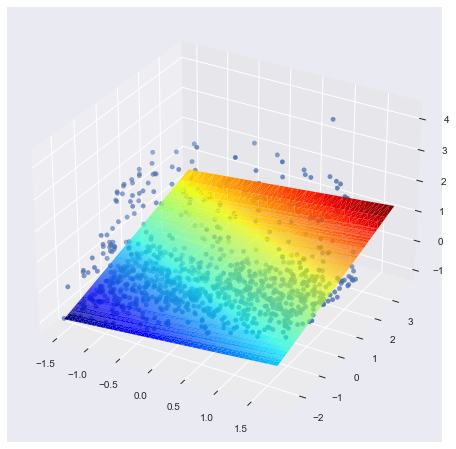

Polynomial of degree 2
L1: 0
epoch =  0 error =  1472.2938360879955
epoch =  500 error =  1002.5112342528438
epoch =  1000 error =  772.8426338186882
epoch =  1500 error =  644.221545831892
epoch =  2000 error =  567.440714586696
epoch =  2500 error =  520.3486630928254
epoch =  3000 error =  491.1238682016013
epoch =  3500 error =  472.8780045761123
epoch =  4000 error =  461.43875163345587
epoch =  4500 error =  454.2368828971738
epoch =  5000 error =  449.6786608276142


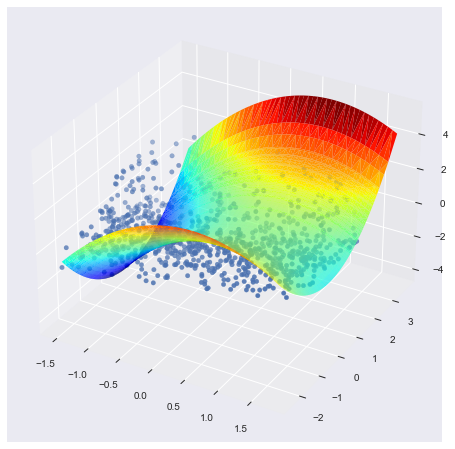

Polynomial of degree 3
L1: 0
epoch =  0 error =  1401.8934457130895
epoch =  500 error =  662.5066891027517
epoch =  1000 error =  508.6680730164786
epoch =  1500 error =  465.64356388002625
epoch =  2000 error =  451.59332606435953
epoch =  2500 error =  446.1577957533585


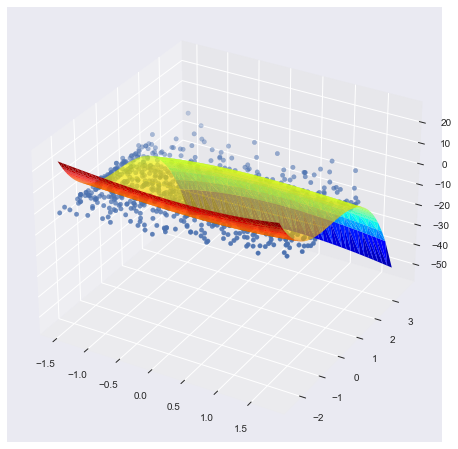

Polynomial of degree 4
L1: 0
epoch =  0 error =  798.8404461741068
epoch =  500 error =  459.1470895567464


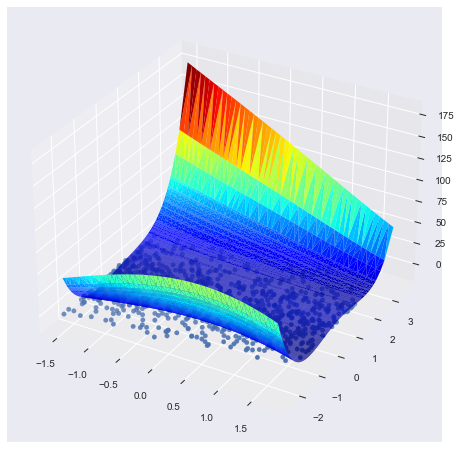

Polynomial of degree 5
L1: 0
epoch =  0 error =  523.8109343437254
epoch =  500 error =  479.3041748260073
epoch =  1000 error =  475.3870292855945
epoch =  1500 error =  472.03504089516247
epoch =  2000 error =  469.0621172080065
epoch =  2500 error =  466.41052906370874


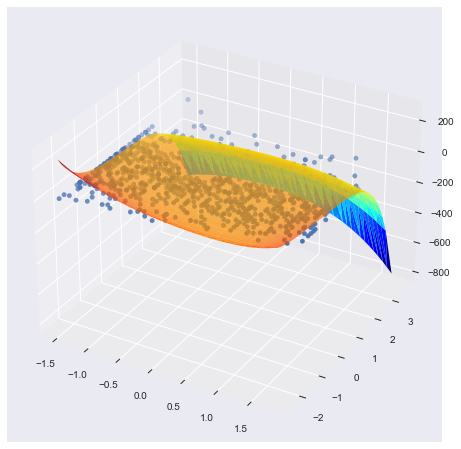

Polynomial of degree 6
L1: 0
epoch =  0 error =  8193.307821291652
epoch =  500 error =  1099.7627289722243
epoch =  1000 error =  914.5738890737384
epoch =  1500 error =  811.3617363604207
epoch =  2000 error =  731.5409631084126
epoch =  2500 error =  668.2722079168298
epoch =  3000 error =  618.0055805545041
epoch =  3500 error =  578.0267335265055
epoch =  4000 error =  546.1965347960846
epoch =  4500 error =  520.8253513561198
epoch =  5000 error =  500.5778123916404
epoch =  5500 error =  484.397979289603
epoch =  6000 error =  471.45040537761116
epoch =  6500 error =  461.07369402054167
epoch =  7000 error =  452.7438950830651
epoch =  7500 error =  446.04564753512807
epoch =  8000 error =  440.6494220850532
epoch =  8500 error =  436.2935685273259
epoch =  9000 error =  432.77014838877307
epoch =  9500 error =  429.91375046483256


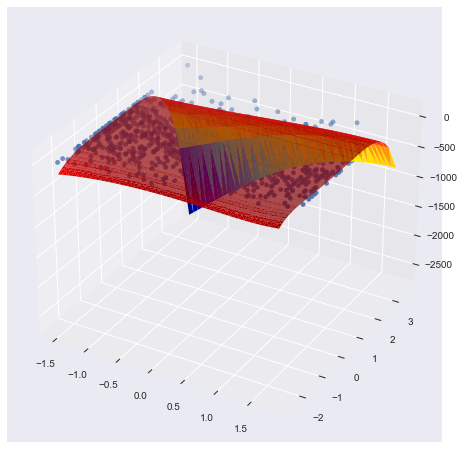

Polynomial of degree 7
L1: 0
epoch =  0 error =  6179.685539663922
epoch =  500 error =  975.2634510853443
epoch =  1000 error =  779.8616137082207
epoch =  1500 error =  677.282546794223
epoch =  2000 error =  606.9502341070587
epoch =  2500 error =  558.0017749250358
epoch =  3000 error =  523.7480938977637
epoch =  3500 error =  499.6456506955936
epoch =  4000 error =  482.58617319087597
epoch =  4500 error =  470.4347758206829
epoch =  5000 error =  461.71931317757526
epoch =  5500 error =  455.42052568342615
epoch =  6000 error =  450.82978509020415
epoch =  6500 error =  447.45232993779575


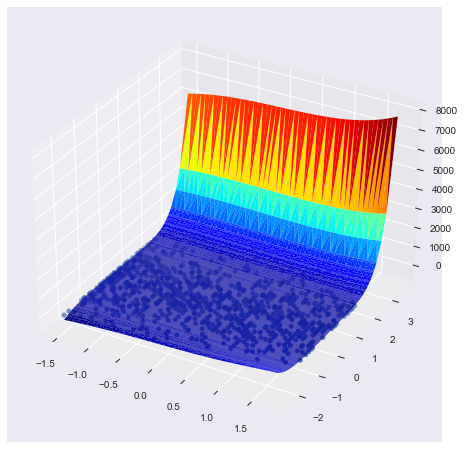

Polynomial of degree 8
L1: 0
epoch =  0 error =  49755.968907019684
epoch =  500 error =  3807.7946836891024
epoch =  1000 error =  2635.899099465741
epoch =  1500 error =  1919.1404857722105
epoch =  2000 error =  1447.292845261934
epoch =  2500 error =  1134.7403390642596
epoch =  3000 error =  926.5289405755167
epoch =  3500 error =  786.9470603629195
epoch =  4000 error =  692.702834582451
epoch =  4500 error =  628.5484000061831
epoch =  5000 error =  584.4627751971174
epoch =  5500 error =  553.8329651913798
epoch =  6000 error =  532.276041077851
epoch =  6500 error =  516.8738958145818
epoch =  7000 error =  505.67443532693346
epoch =  7500 error =  497.36529438131555
epoch =  8000 error =  491.059614036107
epoch =  8500 error =  486.1548454355516
epoch =  9000 error =  482.2393060171021
epoch =  9500 error =  479.03007448818136


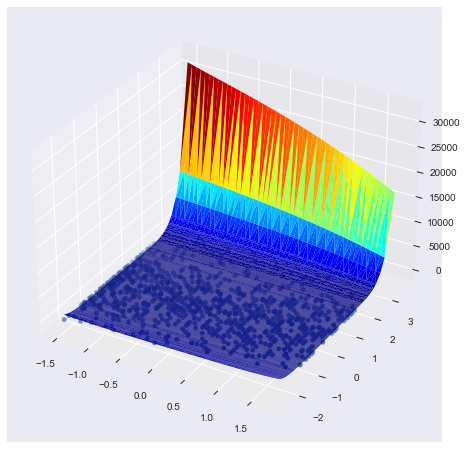

Polynomial of degree 9
L1: 0
epoch =  0 error =  39789.68156016075
epoch =  500 error =  1111.2555152825712
epoch =  1000 error =  783.8765508905465
epoch =  1500 error =  669.9559367509504
epoch =  2000 error =  607.7006399824998
epoch =  2500 error =  571.8752912999607
epoch =  3000 error =  549.941556735437
epoch =  3500 error =  535.4810080279083
epoch =  4000 error =  525.1640019237167
epoch =  4500 error =  517.2373393176955
epoch =  5000 error =  510.7618419790468
epoch =  5500 error =  505.2239194088677
epoch =  6000 error =  500.33544982017725
epoch =  6500 error =  495.9294689946057
epoch =  7000 error =  491.90514008518926
epoch =  7500 error =  488.198362726707
epoch =  8000 error =  484.76587772932265
epoch =  8500 error =  481.57655905724124
epoch =  9000 error =  478.6065782958882
epoch =  9500 error =  475.8366796492032


MemoryError: Unable to allocate 368. MiB for an array with shape (877969, 55) and data type float64

In [24]:
for j in range(1,11):
    L1_coeff = [0]
    print("Polynomial of degree",j)
    for i in L1_coeff:
        print("L1:",i)
        X,y=poly_model(j,df)
        X_train,X_test,X_valid,y_train,y_valid,y_test=feature_scaling(X,y)
        wt,error,acc,rmsev=Lasso_Regularization_gd(i,X_train,y_train)
        X1=X_train[0:,1]
        X2=X_train[0:,2]
        X1,X2=np.meshgrid(X1,X2)
        X1=X1.flatten()
        X2=X2.flatten()
        matr=np.array(np.vstack((X1,X2)).T,dtype='float')
        poly=PolynomialFeatures(j)
        data=poly.fit_transform(matr)
        Z=data@wt
        fig=plt.figure(figsize=(8,8))
        axes=fig.gca(projection='3d')
        axes.scatter3D(X_train[0:,1],X_train[0:,2],y_train)
        axes.plot_trisurf(X1,X2,Z.flatten(),cmap="jet")
        plt.show()
end=time.time()
print("Time taken is: ",(end-start))